In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [91]:
def DTWDistance(s1, s2, w = None):
    rows = len(s1) + 1
    cols = len(s2) + 1
    DTW = np.zeros((rows, cols))
    
    if w:
        w = max(w, abs(len(s1)-len(s2)))
        
        for i in range(0, rows):
            for j in range(0, cols):
                DTW[i, j] = float('inf')
        
        DTW[0, 0] = 0
        
        for i in range(1, rows):
            for j in range(max(1, i-w), min(cols, i+w+1)):
                DTW[i, j] = 0
        
        distance = 0
        
        for i in range(1, rows):
            for j in range(max(1, i-w), min(cols, i+w+1)):
                distance = (s1[i-1] - s2[j-1]) ** 2
                DTW[i,j] = distance + min(DTW[i-1,j], DTW[i-1,j-1], DTW[i, j-1])
    return DTW

In [95]:
def distance_cost_plot(distances):
    im = plt.imshow(distances, interpolation='nearest', cmap='Reds') 
    plt.gca().invert_yaxis()
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.colorbar();

In [108]:
x = np.array([12, 7, 6, 9, 13, 7, 2, 3, 5, 8, 1]).reshape(-1, 1)
y = np.array([1, 1, 2, 4, 2, 1, 2, 0]).reshape(-1, 1)

In [132]:
dtw = DTWDistance(x, y, 6)
dtw

array([[  0.,  inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf],
       [ inf, 121., 242., 342., 406., 506., 627., 727.,  inf],
       [ inf, 157., 157., 182., 191., 216., 252., 277., 326.],
       [ inf, 182., 182., 173., 177., 193., 218., 234., 270.],
       [ inf, 246., 246., 222., 198., 226., 257., 267., 315.],
       [ inf, 390., 390., 343., 279., 319., 370., 378., 436.],
       [ inf, 426., 426., 368., 288., 304., 340., 365., 414.],
       [ inf, 427., 427., 368., 292., 288., 289., 289., 293.],
       [ inf,  inf, 431., 369., 293., 289., 292., 290., 298.],
       [ inf,  inf,  inf, 378., 294., 298., 305., 299., 315.],
       [ inf,  inf,  inf,  inf, 310., 330., 347., 335., 363.],
       [ inf,  inf,  inf,  inf,  inf, 311., 311., 312., 313.]])

In [119]:
path = []
i = len(x)
j = len(y)
path.append([i, j])
while i>0 or j>0:
    if i==0:
        j = j - 1
    elif j==0:
        i = i - 1
    else:
        if dtw[i-1, j] == min(dtw[i-1, j-1], dtw[i-1, j], dtw[i, j-1]):
            i = i - 1
        elif dtw[i, j-1] == min(dtw[i-1, j-1], dtw[i-1, j], dtw[i, j-1]):
            j = j-1
        else:
            i = i - 1
            j = j- 1
    path.append([i, j])
path

[[11, 8],
 [11, 7],
 [11, 6],
 [10, 5],
 [9, 4],
 [8, 4],
 [7, 4],
 [6, 4],
 [5, 4],
 [4, 4],
 [3, 3],
 [2, 2],
 [1, 1],
 [0, 0]]

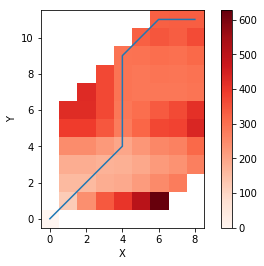

In [120]:
distance_cost_plot(dtw)
path_x = [point[0] for point in path]
path_y = [point[1] for point in path]
plt.plot(path_y, path_x);

11 [1] : 8 [0]
11 [1] : 7 [2]
11 [1] : 6 [1]
10 [8] : 5 [2]
9 [5] : 4 [4]
8 [3] : 4 [4]
7 [2] : 4 [4]
6 [7] : 4 [4]
5 [13] : 4 [4]
4 [9] : 4 [4]
3 [6] : 3 [2]
2 [7] : 2 [1]
1 [12] : 1 [1]
0 [1] : 0 [0]


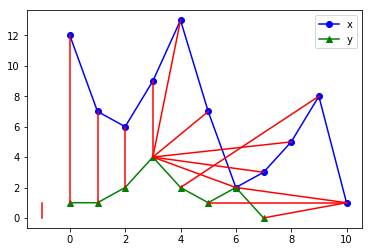

In [121]:
plt.plot(x, 'bo-' ,label='x')
plt.plot(y, 'g^-', label = 'y')
plt.legend();
for [map_x, map_y] in path:
    print(map_x, x[map_x-1], ":", map_y, y[map_y-1])
    
    plt.plot([map_x-1, map_y-1], [x[map_x-1], y[map_y-1]], 'r')